<div align = "center">
<h1>EE 325 Digital Signal Processing</h1>
<h2>Laboratory Assignment 1</h2>
<h3>E/19/445</h3>
</div>

In [67]:
import numpy as np
import scipy.fft as fft
import matplotlib.pyplot as plt
from scipy.signal import correlate, find_peaks

# Question 1

In [2]:
x, y, a, b, c = 1, 9, 4, 4, 5

f1 = 10 + a
f2 = 30 + b
f3 = 70 + c

t = np.arange(0,101,0.001)

v_t = np.random.normal(loc=0, scale=1, size=len(t))

signal_1 = np.sin(2 * np.pi * f1 * t) + np.sin(2 * np.pi * f2 * t) + np.sin(2 * np.pi * f3 * t) + v_t

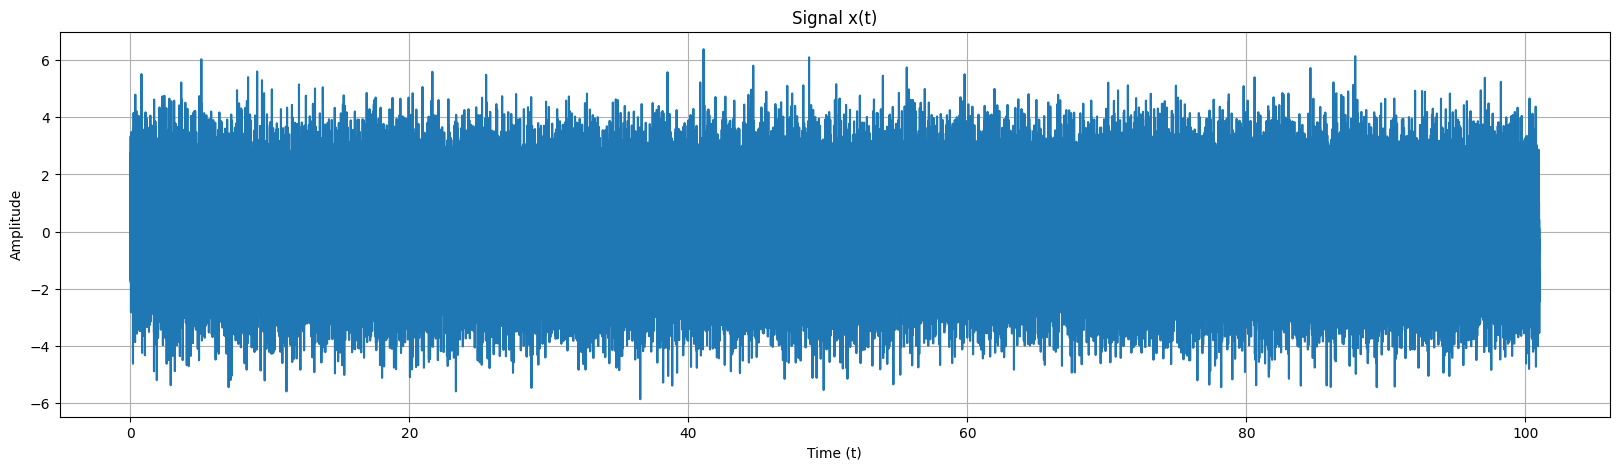

In [3]:
plt.figure(figsize=(20, 5))
plt.plot(t, signal_1)
plt.title('Signal x(t)')
plt.xlabel('Time (t)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

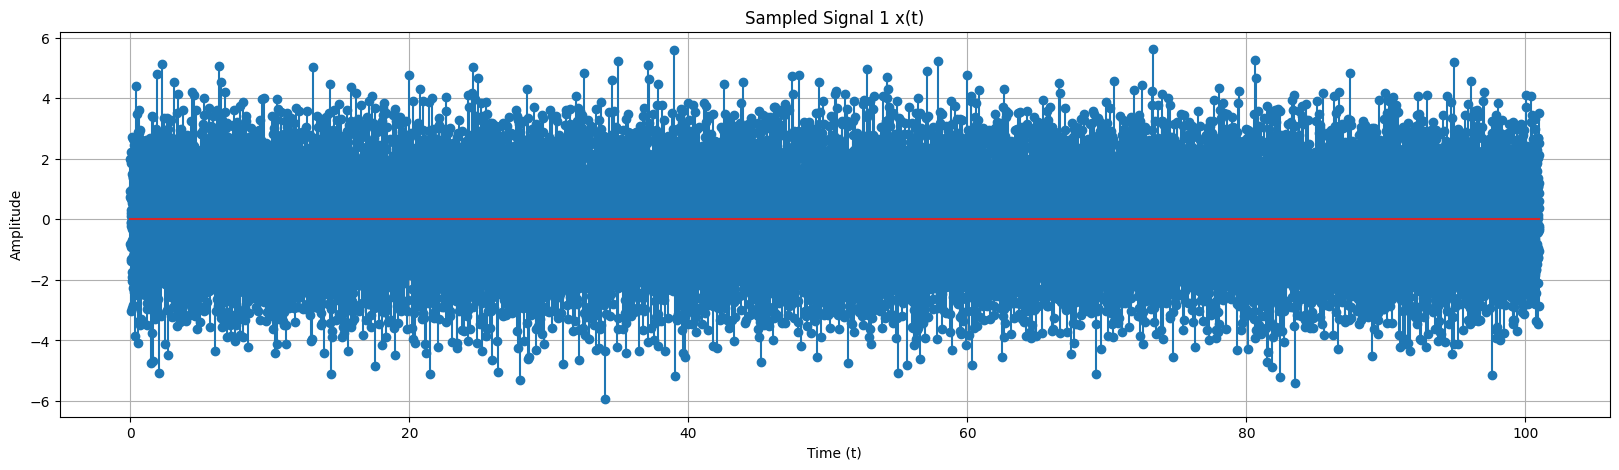

In [4]:
Fs = 200
t_sampled = np.arange(0,101,1/Fs)

v_t_sampled = np.random.normal(loc=0, scale=1, size=len(t_sampled))

signal_1_sampled = np.sin(2 * np.pi * f1 * t_sampled) + np.sin(2 * np.pi * f2 * t_sampled) + np.sin(2 * np.pi * f3 * t_sampled) + v_t_sampled

plt.figure(figsize=(20, 5))
plt.stem(t_sampled, signal_1_sampled)
plt.title('Sampled Signal 1 x(t)')
plt.xlabel('Time (t)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

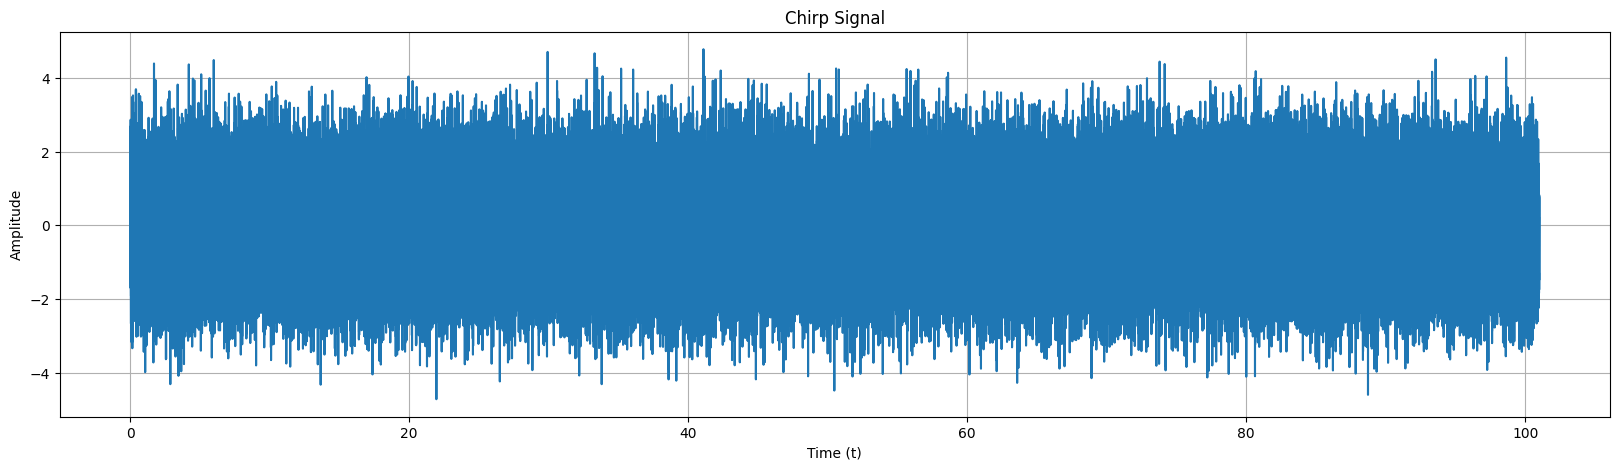

In [5]:
chirp_signal = np.sin(20*np.pi*t + 2*np.pi*(t**2/150)) + v_t

plt.figure(figsize=(20, 5))
plt.plot(t, chirp_signal)
plt.title('Chirp Signal')
plt.xlabel('Time (t)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

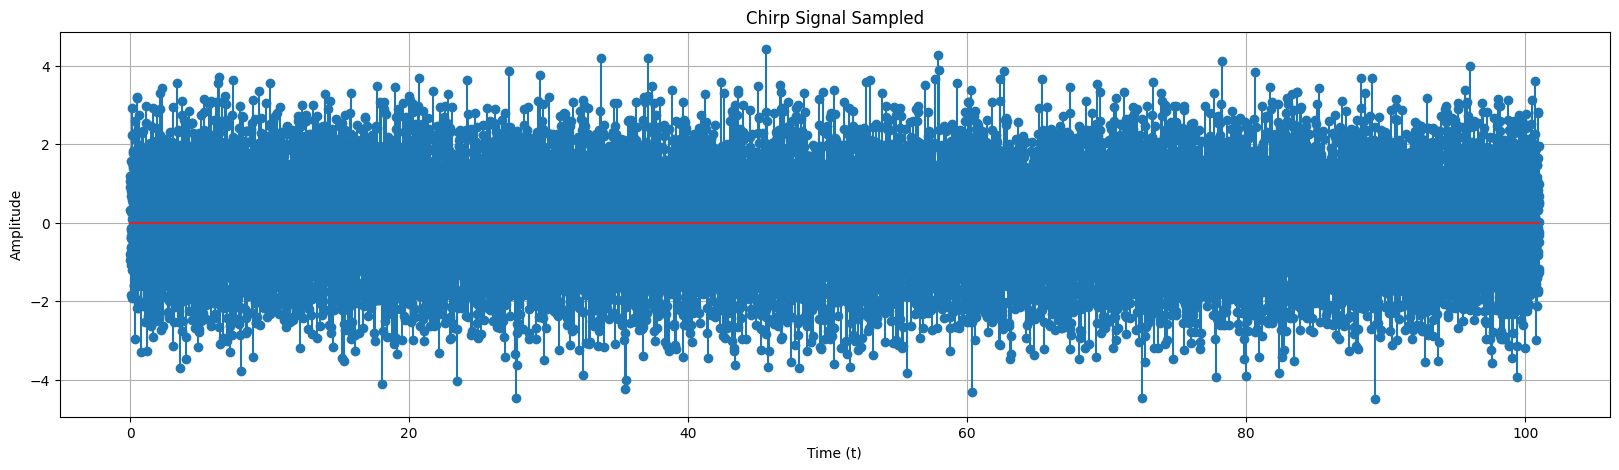

In [6]:
chirp_signal_sampled = np.sin(20*np.pi*t_sampled + 2*np.pi*(t_sampled**2/150)) + v_t_sampled

plt.figure(figsize=(20, 5))
plt.stem(t_sampled, chirp_signal_sampled)
plt.title('Chirp Signal Sampled')
plt.xlabel('Time (t)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Question 2

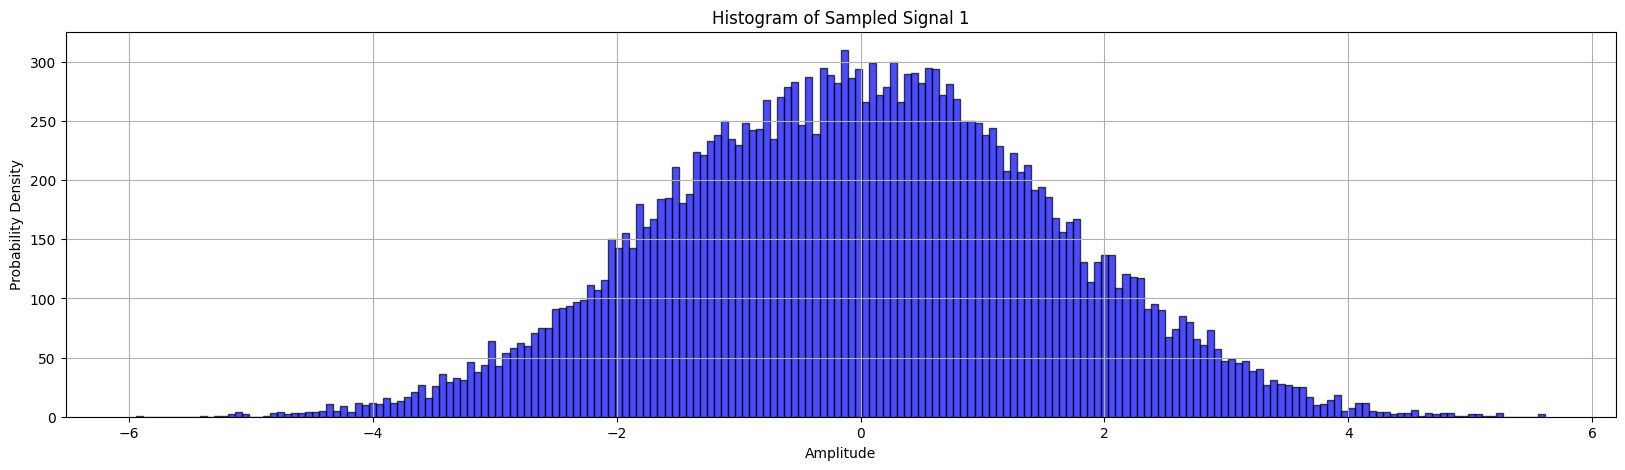

In [7]:
number_of_samples = Fs

plt.figure(figsize=(20, 5))
plt.hist(signal_1_sampled, bins = number_of_samples, color = 'blue', edgecolor = 'black', alpha=0.7) 
plt.title('Histogram of Sampled Signal 1')
plt.xlabel('Amplitude')
plt.ylabel('Probability Density')
plt.grid(True)
plt.show()

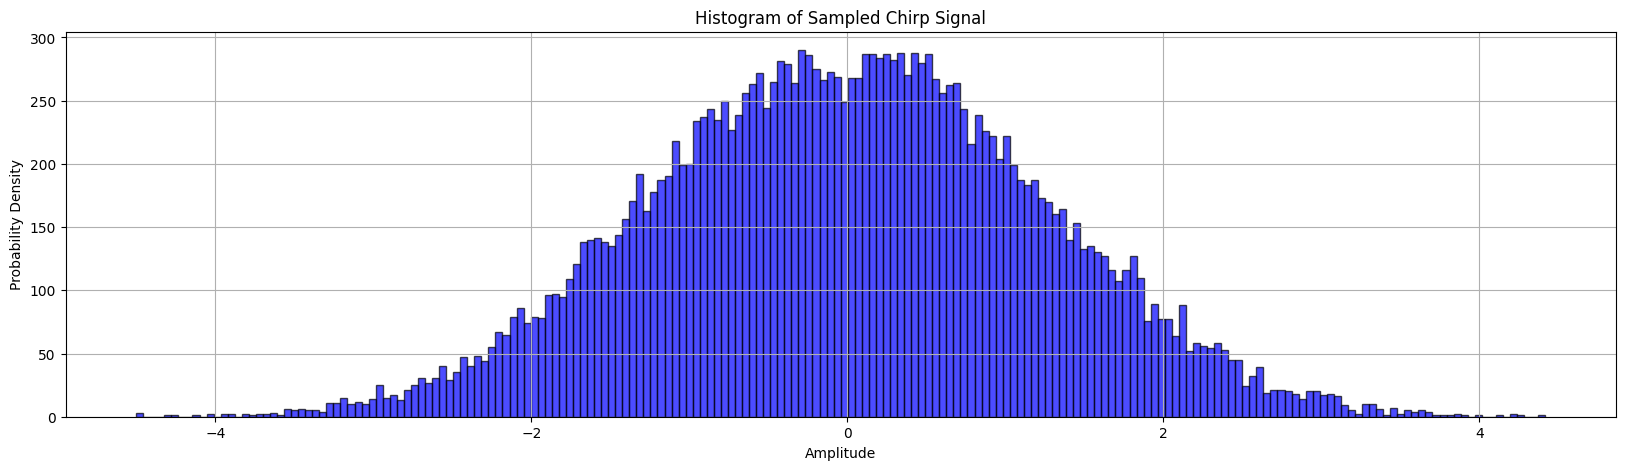

In [8]:
plt.figure(figsize=(20, 5))
plt.hist(chirp_signal_sampled, bins = number_of_samples, color = 'blue', edgecolor = 'black', alpha=0.7)
plt.title('Histogram of Sampled Chirp Signal')
plt.xlabel('Amplitude')
plt.ylabel('Probability Density')
plt.grid(True)
plt.show()

# Question 3

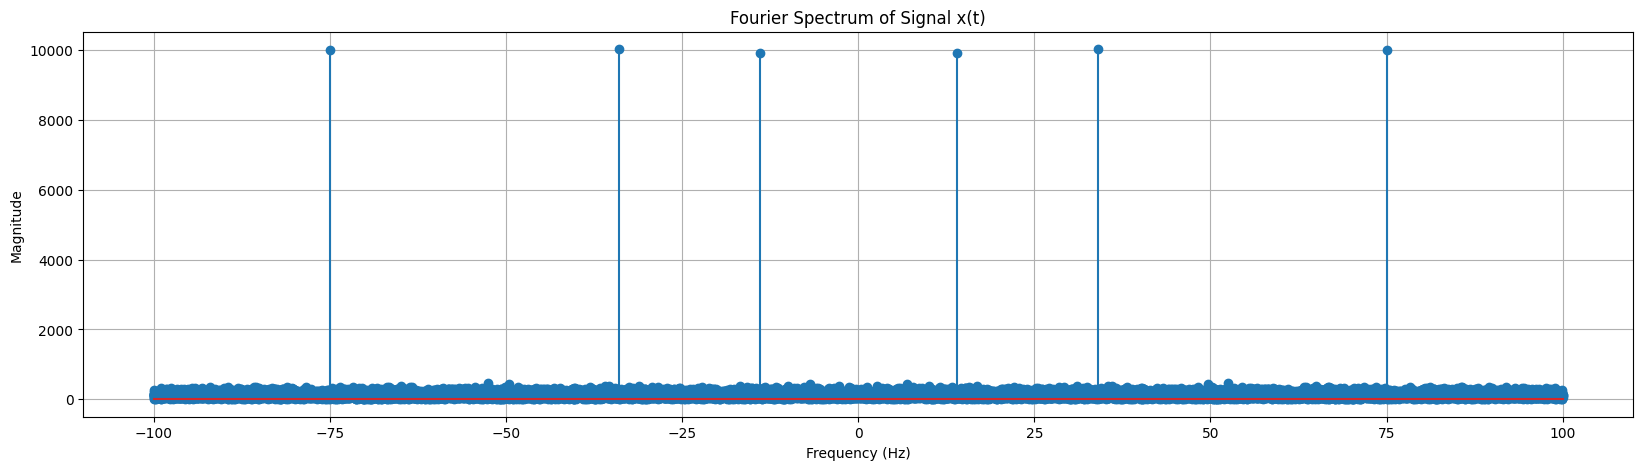

In [9]:
DFT_signal_1 = fft.fft(signal_1_sampled)
freq_signal_1 = fft.fftfreq(len(signal_1_sampled), 1/Fs)

plt.figure(figsize=(20, 5))
plt.stem(freq_signal_1, np.abs(DFT_signal_1))
plt.title('Fourier Spectrum of Signal x(t)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

### Estimated Frequencies for signal 1
$\begin{align}
\pm 14, \: \: \pm 34, \: \: \pm 75
\end{align}$

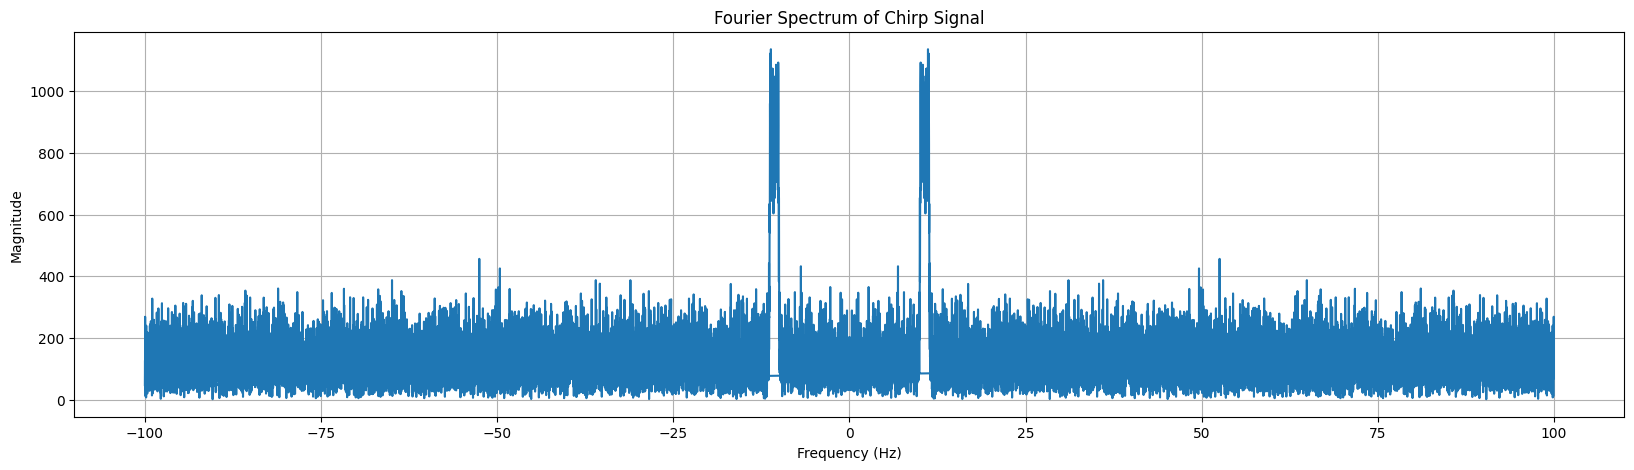

In [10]:
DFT_chirp_signal = fft.fft(chirp_signal_sampled)
freq_chirp_signal = fft.fftfreq(len(chirp_signal_sampled), 1/Fs)

plt.figure(figsize=(20, 5))
plt.plot(freq_chirp_signal, np.abs(DFT_chirp_signal))
plt.title('Fourier Spectrum of Chirp Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

# Question 4

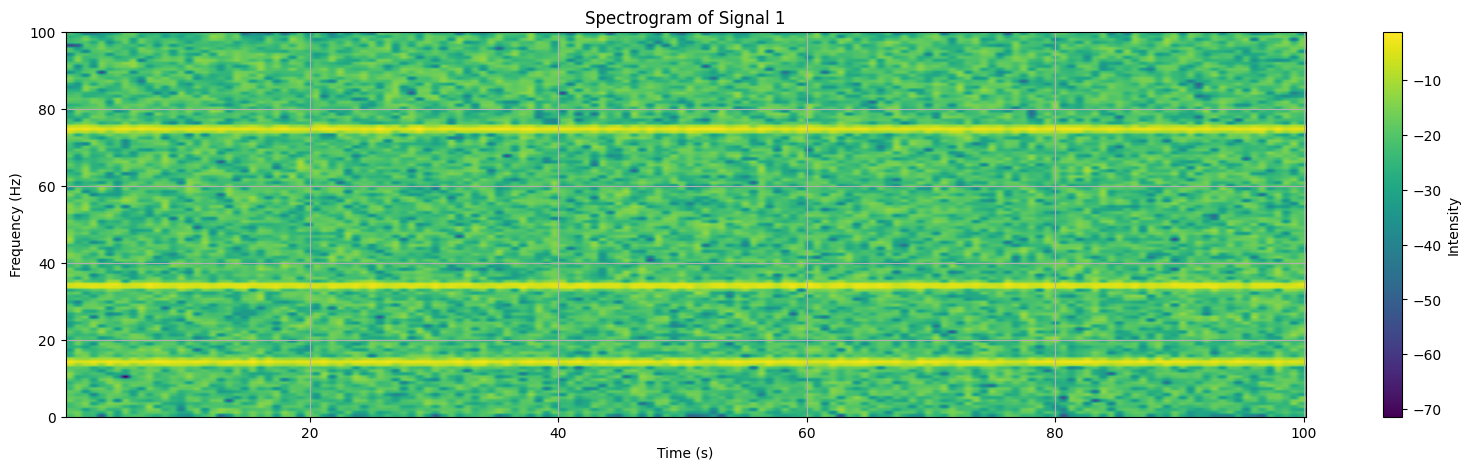

In [16]:
plt.figure(figsize=(20, 5))
plt.specgram(signal_1_sampled, Fs = Fs)
plt.title('Spectrogram of Signal 1')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label = "Intensity")
plt.grid(True)
plt.show()

### Estimated Frequencies for signal 1
$\begin{align}
\pm 14, \: \: \pm 34, \: \: \pm 75
\end{align}$

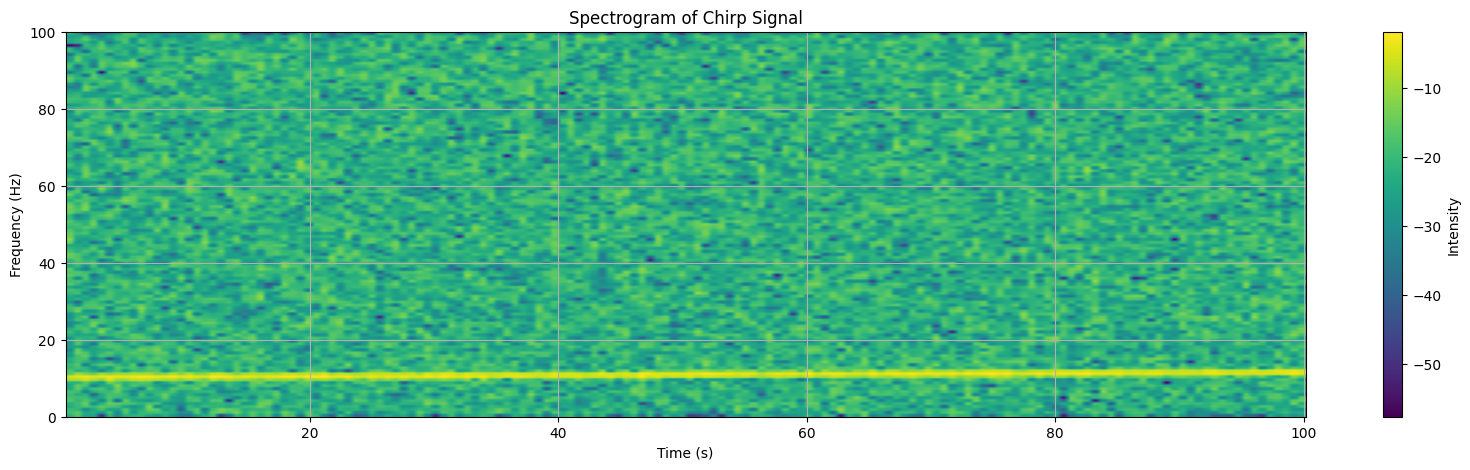

In [17]:
plt.figure(figsize=(20, 5))
plt.specgram(chirp_signal_sampled, Fs = Fs)
plt.title('Spectrogram of Chirp Signal')
plt.xlabel('Time (s)') 
plt.ylabel('Frequency (Hz)')
plt.colorbar(label = "Intensity")
plt.grid(True)
plt.show()

# Question 5

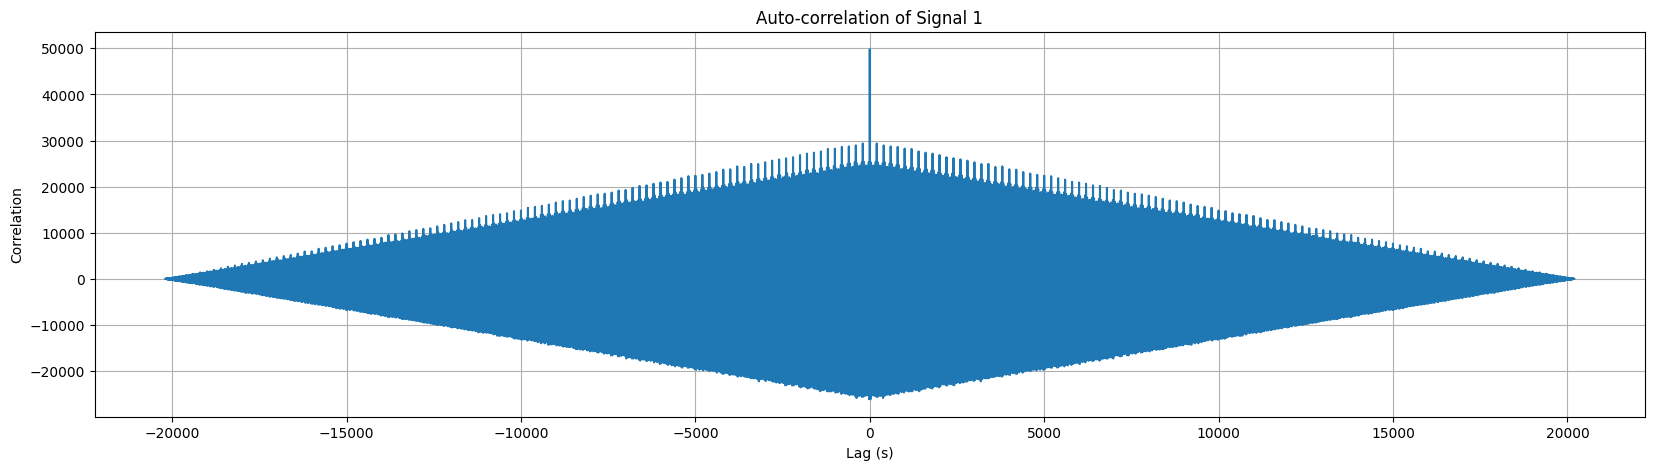

In [72]:
auto_correlation_signal_1  = correlate(signal_1_sampled, signal_1_sampled, mode = "full")

lags = np.arange(-len(signal_1_sampled) + 1, len(signal_1_sampled))

plt.figure(figsize=(20, 5))
plt.plot(lags, auto_correlation_signal_1)
plt.title('Auto-correlation of Signal 1')
plt.xlabel('Lag (s)')
plt.ylabel('Correlation')
plt.grid(True)
plt.show()

In [73]:
peaks, _ = find_peaks(auto_correlation_signal_1, height=0)
print(peaks[0])
print(lags[peaks[0]])

# Compute fundamental period
fundamental_period = (peaks[1] - peaks[0]) / 200  # Convert lag to time (seconds)

print("Fundamental period of Signal 1:", fundamental_period, "seconds")

5
-20194
Fundamental period of Signal 1: 0.01 seconds
